## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [27]:
import os
import keras
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
def build_mlp(dropout_ratio,regularizer,nurons = [512,256,128]):
    input_layer = keras.layers.Input([x_train.shape[-1]])
    for index,nuron in enumerate(nurons):
        if index == 0:
            x = keras.layers.Dense(units = nuron,kernel_regularizer = regularizer)(input_layer)
        else:
            x = keras.layers.Dense(units = nuron,kernel_regularizer = regularizer)(x)
        x = keras.layers.Dropout(dropout_ratio)(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.Activation('relu')(x)
    output_layer = keras.layers.Dense(units = 10,activation = 'softmax')(x)
    model = keras.models.Model(inputs = [input_layer],outputs = [output_layer])
    return model

In [37]:
"""Code Here
設定超參數
"""
dropout_ratio = .2
batch_size = 256
epoch = 60
learning_rate = 1e-3
momentum = .9

In [7]:
def train_model(regularizer,name):
    result = {}
    model = build_mlp(dropout_ratio,regularizer)
    optimizer = keras.optimizers.SGD(lr = 1e-3,momentum = momentum,nesterov = True)
    model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'], optimizer = optimizer)
    model.fit(x_train,y_train,
             epochs = epoch,
             batch_size = batch_size,
             validation_data = (x_test,y_test),
             shuffle = True)
    
    history = model.history.history
    result[name] = {'val_loss':history['val_loss'],
                   'loss':history['loss'],
                   'val_accuracy':history['val_accuracy'],
                   'accuracy':history['accuracy']}
    return result

In [48]:
l1_result  = train_model(keras.regularizers.l1(1e-3),name = 'l1:1e-8')

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 7s 147us/step - loss: 40.6837 - accuracy: 0.2216 - val_loss: 38.7871 - val_accuracy: 0.3110
Epoch 2/60
50000/50000 [==============================] - 6s 124us/step - loss: 37.1445 - accuracy: 0.3185 - val_loss: 35.4487 - val_accuracy: 0.3586
Epoch 3/60
50000/50000 [==============================] - 5s 106us/step - loss: 33.9346 - accuracy: 0.3549 - val_loss: 32.3483 - val_accuracy: 0.3933
Epoch 4/60
50000/50000 [==============================] - 5s 107us/step - loss: 30.9167 - accuracy: 0.3816 - val_loss: 29.4224 - val_accuracy: 0.4091
Epoch 5/60
50000/50000 [==============================] - 5s 107us/step - loss: 28.0779 - accuracy: 0.3986 - val_loss: 26.6629 - val_accuracy: 0.4268
Epoch 6/60
50000/50000 [==============================] - 6s 118us/step - loss: 25.4003 - accuracy: 0.4158 - val_loss: 24.1055 - val_accuracy: 0.4288
Epoch 7/60
50000/50000 [==========================

50000/50000 [==============================] - 6s 112us/step - loss: 2.0132 - accuracy: 0.4721 - val_loss: 2.6121 - val_accuracy: 0.2803
Epoch 56/60
50000/50000 [==============================] - 6s 120us/step - loss: 2.0056 - accuracy: 0.4752 - val_loss: 2.4675 - val_accuracy: 0.3316
Epoch 57/60
50000/50000 [==============================] - 5s 108us/step - loss: 1.9988 - accuracy: 0.4725 - val_loss: 2.1238 - val_accuracy: 0.4376
Epoch 58/60
50000/50000 [==============================] - 5s 107us/step - loss: 1.9926 - accuracy: 0.4752 - val_loss: 2.6287 - val_accuracy: 0.2840
Epoch 59/60
50000/50000 [==============================] - 5s 106us/step - loss: 1.9858 - accuracy: 0.4762 - val_loss: 2.1241 - val_accuracy: 0.4230
Epoch 60/60
50000/50000 [==============================] - 5s 106us/step - loss: 1.9766 - accuracy: 0.4784 - val_loss: 2.1831 - val_accuracy: 0.3814


In [47]:
l2_result=  train_model(keras.regularizers.l2(1e-3),name = 'l2:1e-8')

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 6s 120us/step - loss: 3.5852 - accuracy: 0.2262 - val_loss: 3.3146 - val_accuracy: 0.3259
Epoch 2/60
50000/50000 [==============================] - 5s 102us/step - loss: 3.2877 - accuracy: 0.3210 - val_loss: 3.1688 - val_accuracy: 0.3545
Epoch 3/60
50000/50000 [==============================] - 5s 100us/step - loss: 3.1707 - accuracy: 0.3570 - val_loss: 3.0568 - val_accuracy: 0.3970
Epoch 4/60
50000/50000 [==============================] - 5s 100us/step - loss: 3.1029 - accuracy: 0.3801 - val_loss: 3.0075 - val_accuracy: 0.4084
Epoch 5/60
50000/50000 [==============================] - 5s 101us/step - loss: 3.0431 - accuracy: 0.3955 - val_loss: 2.9683 - val_accuracy: 0.4197
Epoch 6/60
50000/50000 [==============================] - 5s 101us/step - loss: 2.9967 - accuracy: 0.4103 - val_loss: 2.9141 - val_accuracy: 0.4421
Epoch 7/60
50000/50000 [==============================] - 5s 1

50000/50000 [==============================] - 6s 111us/step - loss: 2.0127 - accuracy: 0.6094 - val_loss: 2.3824 - val_accuracy: 0.4963
Epoch 56/60
50000/50000 [==============================] - 6s 127us/step - loss: 1.9947 - accuracy: 0.6148 - val_loss: 2.3454 - val_accuracy: 0.5081
Epoch 57/60
50000/50000 [==============================] - 6s 118us/step - loss: 1.9833 - accuracy: 0.6171 - val_loss: 2.2448 - val_accuracy: 0.5367
Epoch 58/60
50000/50000 [==============================] - 5s 107us/step - loss: 1.9673 - accuracy: 0.6215 - val_loss: 2.2854 - val_accuracy: 0.5238
Epoch 59/60
50000/50000 [==============================] - 6s 114us/step - loss: 1.9574 - accuracy: 0.6213 - val_loss: 2.3502 - val_accuracy: 0.5094
Epoch 60/60
50000/50000 [==============================] - 6s 119us/step - loss: 1.9405 - accuracy: 0.6262 - val_loss: 2.2933 - val_accuracy: 0.5228


In [ ]:
l1_l2_result = train_model(keras.regularizers.l1_l2(1e-14),name = 'l1_l2:1e-8')

In [85]:
def plot_data(results):
    fig,axes = plt.subplots(len(results),2,sharex = True)
    fig.set_size_inches(16,14)
    colors = ['r','g','b','m']
    for row_index,result in enumerate(results):
        for value_type_index,type_name in enumerate(result):
            axes[row_index][0].plot(range(epoch),result[type_name]['val_loss'],'--',color = colors[value_type_index])
            axes[row_index][0].plot(range(epoch),result[type_name]['loss'],'-',label = type_name,color = colors[value_type_index])
            axes[row_index][1].plot(range(epoch),result[type_name]['val_accuracy'],'--',color = colors[value_type_index])
            axes[row_index][1].plot(range(epoch),result[type_name]['accuracy'],'-',label = type_name,color = colors[value_type_index])
        axes[row_index][0].set_title(type_name + 'loss')
        axes[row_index][1].set_title(type_name + 'accuracy')
    fig.legend(loc = 'upper right')

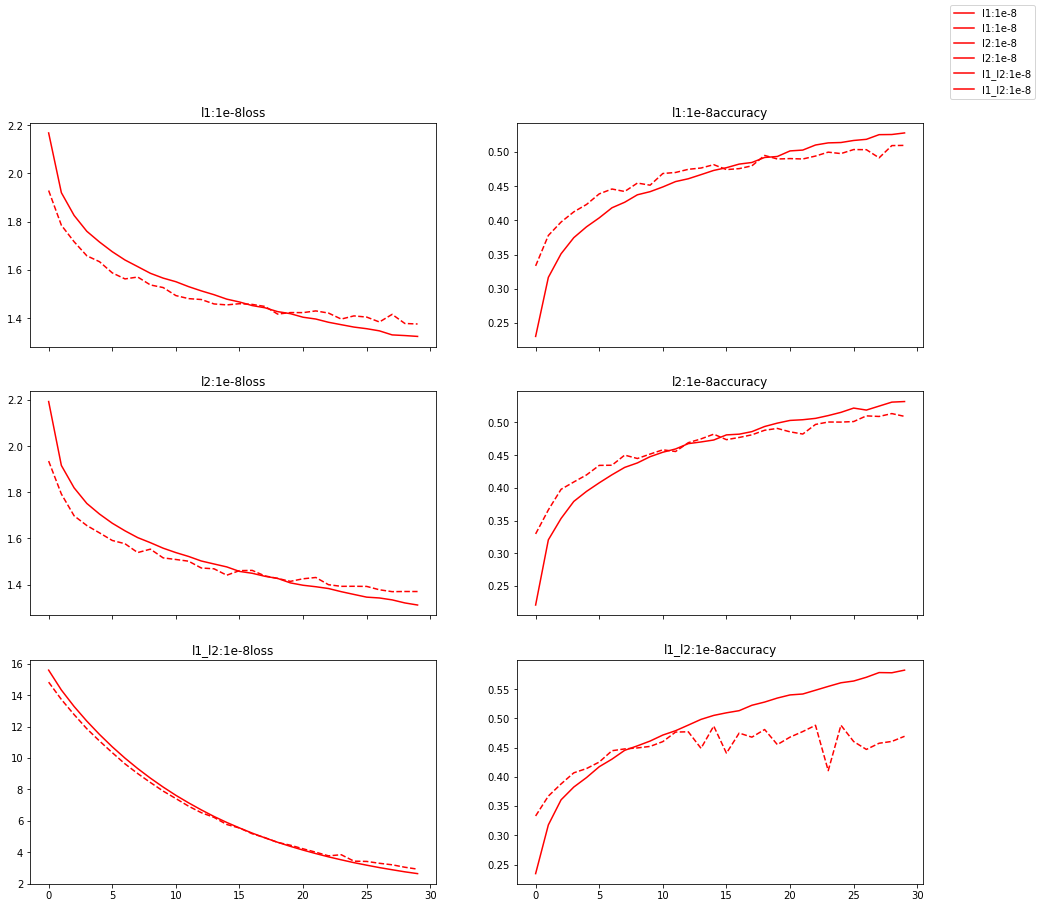

In [31]:
plot_data([l1_result,l2_result,l1_l2_result])#1e-8 epoch = 30

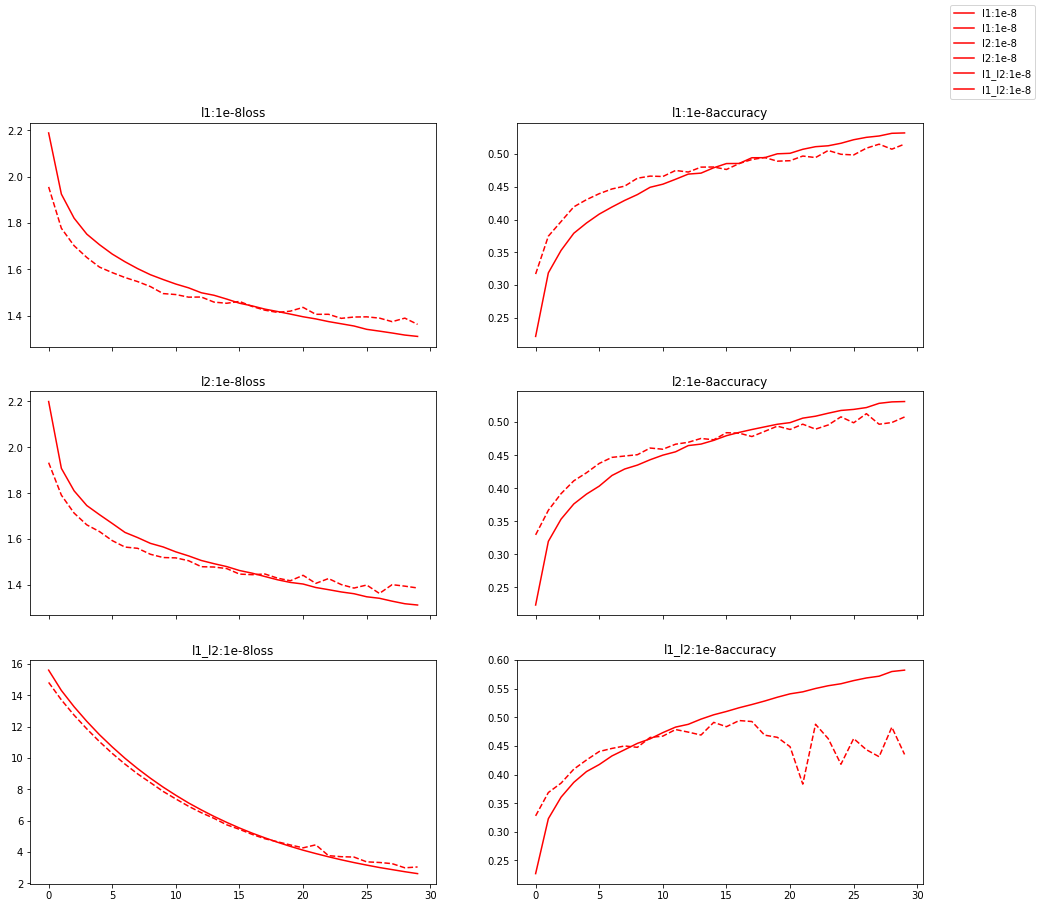

In [36]:
plot_data([l1_result,l2_result,l1_l2_result])#1e-14 epoch = 30

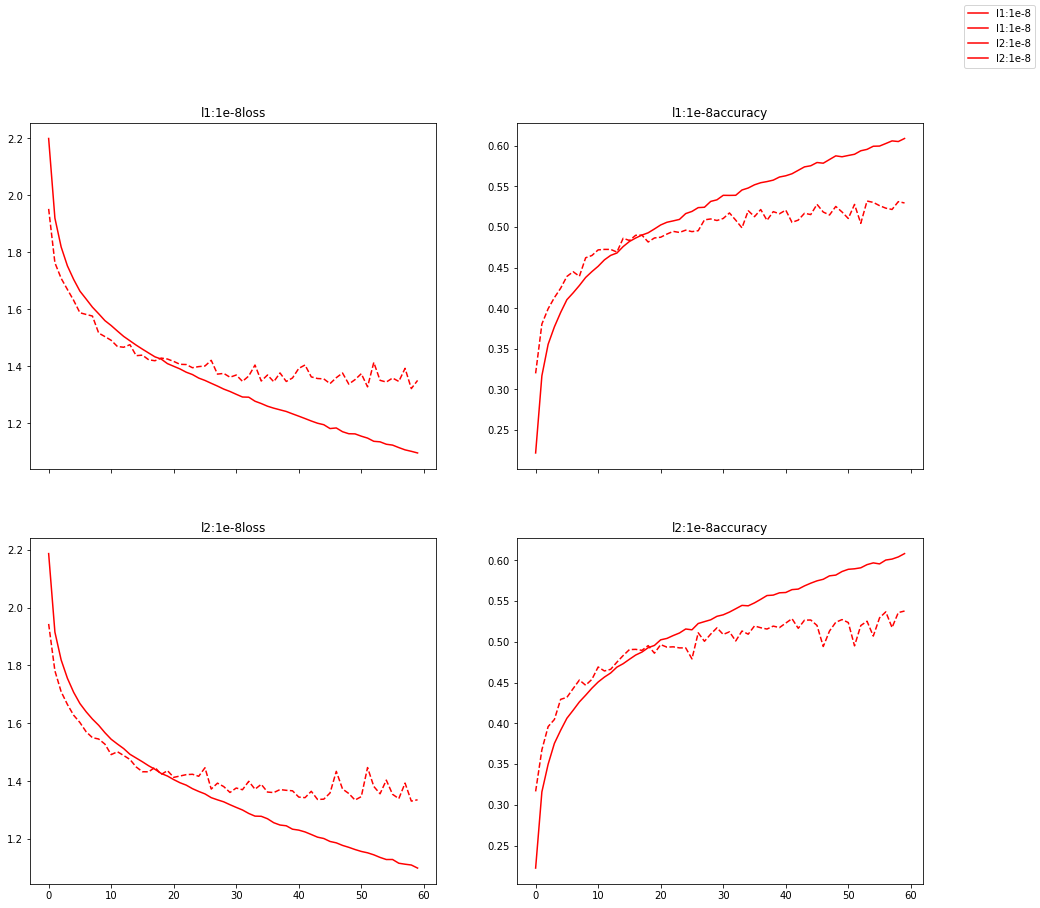

In [44]:
plot_data([l1_result,l2_result])#1e-8 epoch = 60

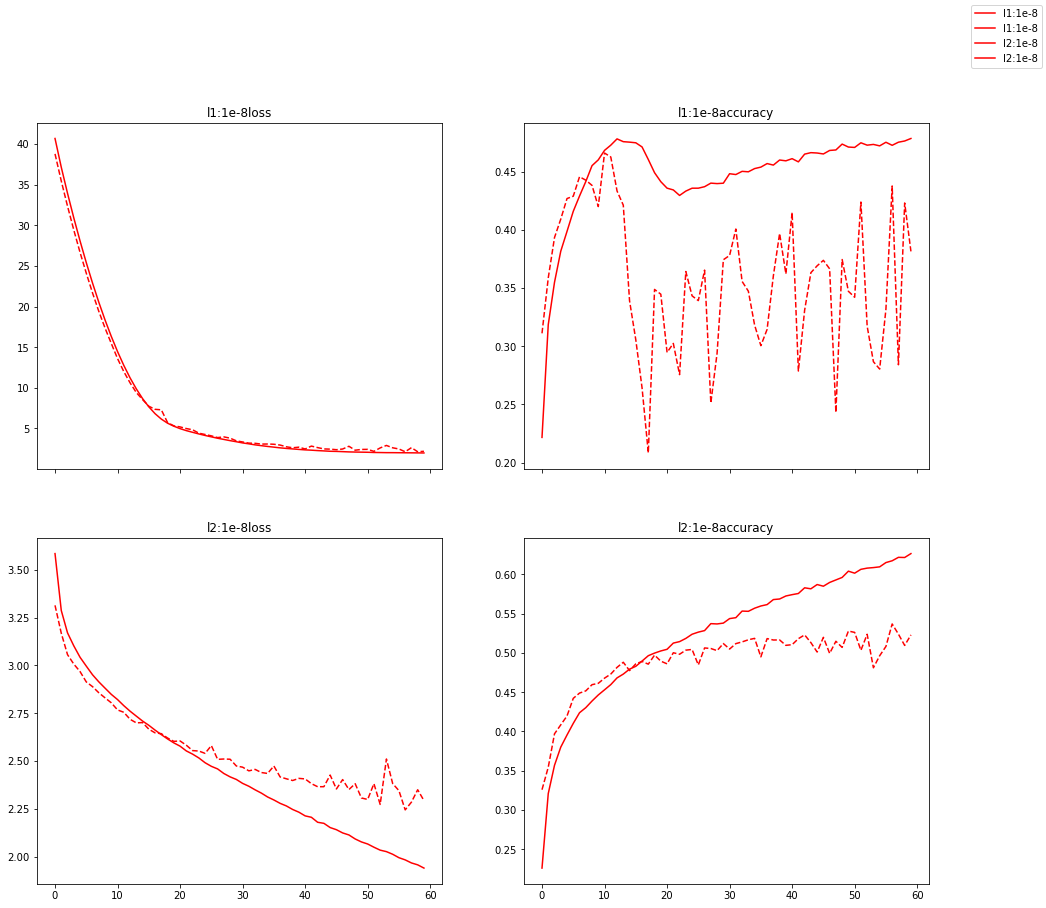

In [49]:
plot_data([l1_result,l2_result])#1e-16 epoch = 60

In [54]:
input_layer = keras.layers.Input([x_train.shape[-1]])
x = keras.layers.Dense(units = 512,activation = 'relu')(input_layer)
x = keras.layers.Dense(units = 256,activation = 'relu')(x)
x = keras.layers.Dense(units = 128,activation = 'relu')(x)
output_layer = keras.layers.Dense(units = 10,activation = 'softmax')(x)
model = keras.models.Model(inputs = [input_layer],outputs = [output_layer])
optimizer = keras.optimizers.SGD(lr =learning_rate,momentum = momentum,nesterov = True)
model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = optimizer)
model.fit(x_train,y_train,
         epochs = epoch,
         batch_size = batch_size,
         validation_data = (x_test,y_test),
         shuffle = True)
result = model.history.history

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 4s 85us/step - loss: 2.0726 - accuracy: 0.2645 - val_loss: 1.9404 - val_accuracy: 0.3143
Epoch 2/60
50000/50000 [==============================] - 4s 78us/step - loss: 1.8772 - accuracy: 0.3436 - val_loss: 1.8432 - val_accuracy: 0.3526
Epoch 3/60
50000/50000 [==============================] - 4s 82us/step - loss: 1.8028 - accuracy: 0.3726 - val_loss: 1.7812 - val_accuracy: 0.3812
Epoch 4/60
50000/50000 [==============================] - 4s 81us/step - loss: 1.7534 - accuracy: 0.3888 - val_loss: 1.7420 - val_accuracy: 0.3935
Epoch 5/60
50000/50000 [==============================] - 4s 82us/step - loss: 1.7152 - accuracy: 0.4016 - val_loss: 1.7022 - val_accuracy: 0.4086
Epoch 6/60
50000/50000 [==============================] - 5s 102us/step - loss: 1.6820 - accuracy: 0.4157 - val_loss: 1.6722 - val_accuracy: 0.4184
Epoch 7/60
50000/50000 [==============================] - 4s 88us/s

Epoch 56/60
50000/50000 [==============================] - 4s 89us/step - loss: 1.0760 - accuracy: 0.6214 - val_loss: 1.5713 - val_accuracy: 0.4693
Epoch 57/60
50000/50000 [==============================] - 5s 91us/step - loss: 1.0708 - accuracy: 0.6233 - val_loss: 1.3398 - val_accuracy: 0.5300
Epoch 58/60
50000/50000 [==============================] - 5s 92us/step - loss: 1.0622 - accuracy: 0.6277 - val_loss: 1.3673 - val_accuracy: 0.5165
Epoch 59/60
50000/50000 [==============================] - 4s 89us/step - loss: 1.0507 - accuracy: 0.6332 - val_loss: 1.4865 - val_accuracy: 0.4739
Epoch 60/60
50000/50000 [==============================] - 5s 91us/step - loss: 1.0470 - accuracy: 0.6325 - val_loss: 1.3662 - val_accuracy: 0.5213


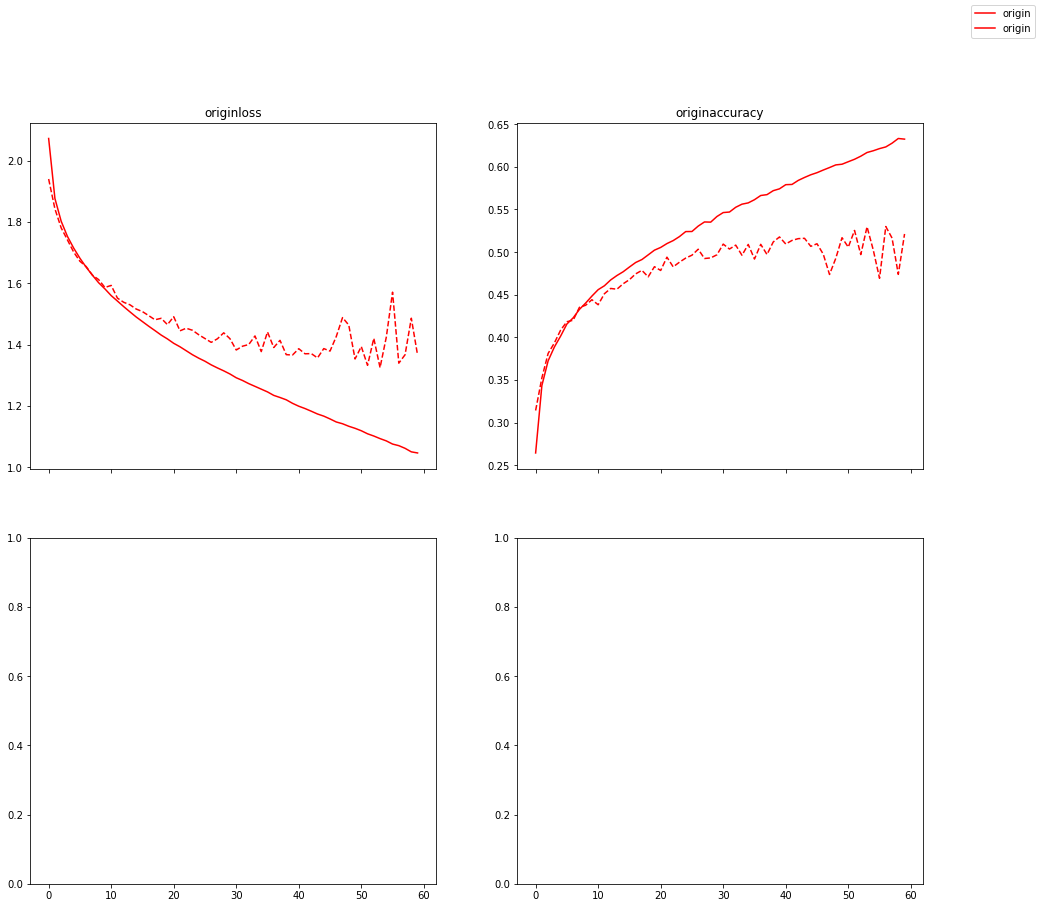

In [86]:
result_origin = {}
result_origin['origin'] = {'val_loss':result['val_loss'],
                'loss':result['loss'],
                'val_accuracy':result['val_accuracy'],
                'accuracy':result['accuracy']}
plot_data([result_origin])